#  Heart Disease Prediction (GridSearchCV)

## STEP 1: Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Step 2 :  Load and Clean Dataset

###  Upload CSV file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


### Load *dataset*

In [ ]:
df = pd.read_csv(next(iter(uploaded)))
print("Original shape:", df.shape)

Original shape: (918, 12)


### Remove duplicates

In [ ]:
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

After removing duplicates: (918, 12)


### Drop nulls if any

In [ ]:
print("Null values:\n", df.isnull().sum())
df = df.dropna()
print("After removing nulls:", df.shape)

Null values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
After removing nulls: (918, 12)


## Step 3 : Encode Categorical Features

In [ ]:
df_clean = df.copy()
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()

for col in cat_cols:
    df_clean[col] = le.fit_transform(df_clean[col])



### Rename target column for clarity



In [ ]:
df_clean.rename(columns={'HeartDisease': 'target'}, inplace=True)

## Step 4 :Visualizations

### 1. Heart Disease Count

/tmp/ipython-input-8-4239877939.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette='Set2')


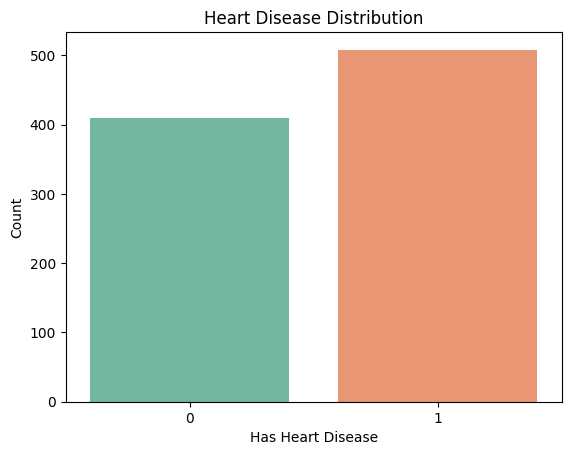

In [ ]:
sns.countplot(data=df, x='HeartDisease', palette='Set2')
plt.title("Heart Disease Distribution")
plt.xlabel("Has Heart Disease")
plt.ylabel("Count")
plt.show()


### 2. Age vs Heart Disease

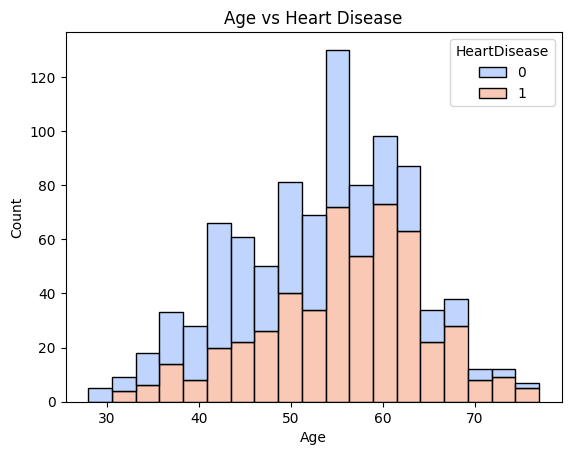

In [ ]:
sns.histplot(data=df, x='Age', hue='HeartDisease', multiple='stack', palette='coolwarm')
plt.title("Age vs Heart Disease")
plt.show()


### 3. Chest Pain Type

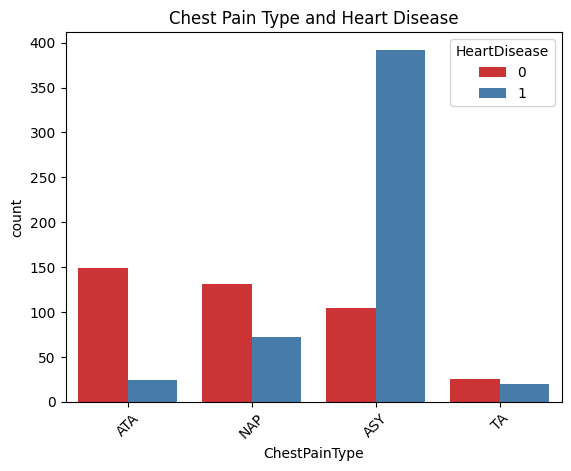

In [ ]:
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette='Set1')
plt.title("Chest Pain Type and Heart Disease")
plt.xticks(rotation=45)
plt.show()

### 4. Correlation Heatmap

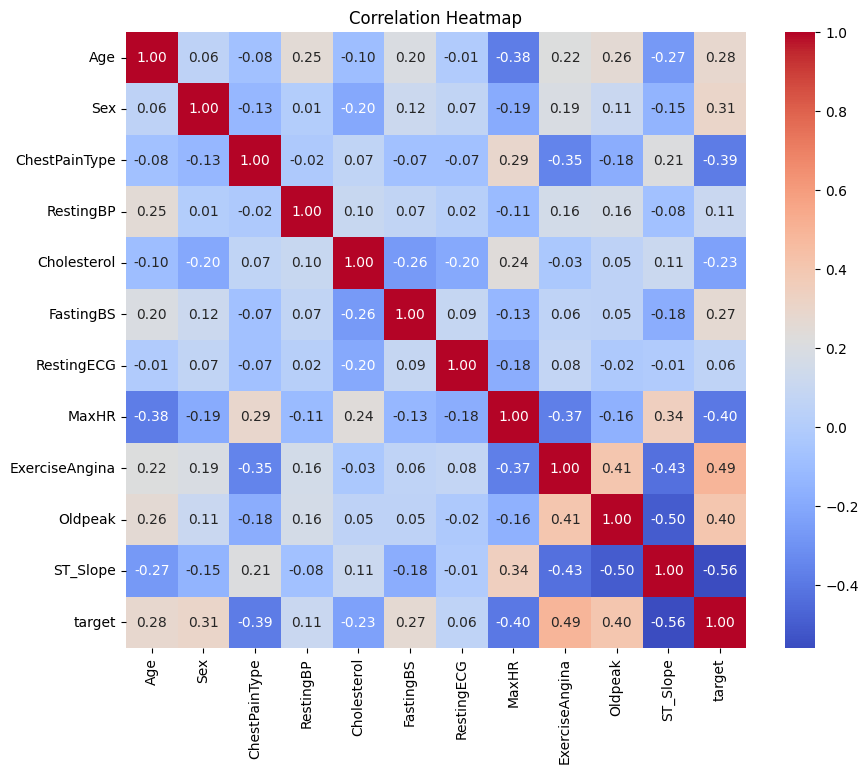

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### 5. Max Heart Rate vs Heart Disease

/tmp/ipython-input-12-2721981497.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y='MaxHR', palette='Set3')


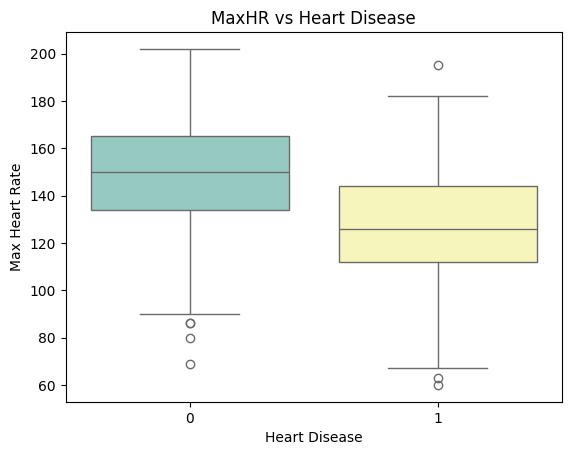

In [ ]:
sns.boxplot(data=df, x='HeartDisease', y='MaxHR', palette='Set3')
plt.title("MaxHR vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Max Heart Rate")
plt.show()

## Step  5 :  Train-Test Split & Scaling

In [ ]:
X = df_clean.drop('target', axis=1)
y = df_clean['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


##  6. GridSearchCV for Logistic Regression

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

log_model = LogisticRegression(max_iter=1000, random_state=42)

grid = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

## Step  7 : Evaluate the Best Model

### Predict using best estimator

In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

### Accuracy

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy after GridSearch: {acc * 100:.2f}%")


🎯 Accuracy after GridSearch: 84.24%


### Classification Report

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        77
           1       0.90      0.82      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



### Confusion Matrix

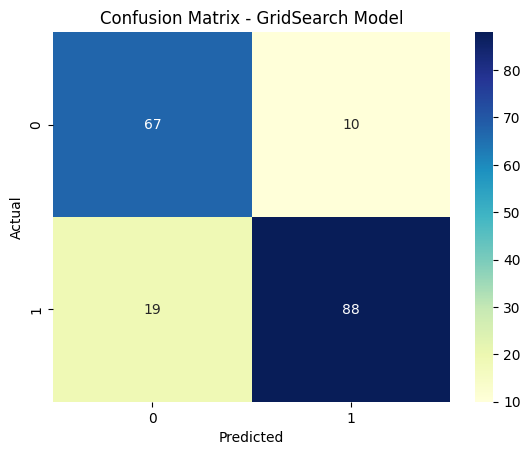

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - GridSearch Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
